# OpenClassrooms - Ingenieur IA
# Projet 2 - Concours Smart City
# ANALYSE EXPLORATOIRE UNIVARIEE DES DONNEES

- A - Présentation générale du jeu de données
- B - Démarche méthodologique d’analyse et de nettoyage de données
- C - Synthèse de l’analyse de données et visualisation des données

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# A - Présentation générale du jeu de données 

# 1 - Chargement des données

In [2]:
df = pd.read_csv('p2-arbres-fr.csv', delimiter=';')

## Type récupéré

In [3]:
type(df)

pandas.core.frame.DataFrame

## Copie des données

In [4]:
data = df.copy()

# 2 - Exploration préliminaire des données avant nettoyage

## Volumétrie des données : nombre de lignes et de colonnes

In [5]:
data_size = data.shape
nb_rows = data_size[0]
nb_columns = data_size[1]
print(f"Nombre de lignes : {nb_rows}")
print(f"Nombre de colonnes : {nb_columns}")

Nombre de lignes : 200137
Nombre de colonnes : 18


### => Nombre d'individus = 200 317 / Nombre de variables = 18

## Description de la structure des données

In [6]:
data.head()

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200137 entries, 0 to 200136
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   200137 non-null  int64  
 1   type_emplacement     200137 non-null  object 
 2   domanialite          200136 non-null  object 
 3   arrondissement       200137 non-null  object 
 4   complement_addresse  30902 non-null   object 
 5   numero               0 non-null       float64
 6   lieu                 200137 non-null  object 
 7   id_emplacement       200137 non-null  object 
 8   libelle_francais     198640 non-null  object 
 9   genre                200121 non-null  object 
 10  espece               198385 non-null  object 
 11  variete              36777 non-null   object 
 12  circonference_cm     200137 non-null  int64  
 13  hauteur_m            200137 non-null  int64  
 14  stade_developpement  132932 non-null  object 
 15  remarquable      

In [8]:
data.dtypes.value_counts()

object     11
float64     4
int64       3
dtype: int64

### => Premières remarques :
- 7 variables quantitatives
- 11 variables qualitatives (catégorielles)

## Indicateurs statistiques pour les variables quantitatives

In [9]:
data.describe()

,id,numero,circonference_cm,hauteur_m,remarquable,geo_point_2d_a,geo_point_2d_b
count,2.001370e+05,0.0,200137.000000,200137.000000,137039.000000,200137.000000,200137.000000
mean,3.872027e+05,NaN,83.380479,13.110509,0.001343,48.854491,2.348208
std,5.456032e+05,NaN,673.190213,1971.217387,0.036618,0.030234,0.051220
min,9.987400e+04,NaN,0.000000,0.000000,0.000000,48.742290,2.210241
25%,1.559270e+05,NaN,30.000000,5.000000,0.000000,48.835021,2.307530
50%,2.210780e+05,NaN,70.000000,8.000000,0.000000,48.854162,2.351095
75%,2.741020e+05,NaN,115.000000,12.000000,0.000000,48.876447,2.386838
max,2.024745e+06,NaN,250255.000000,881818.000000,1.000000,48.911485,2.469759


### => Premières remarques :
- 'id' : identifiant, valeurs uniques
- 'numero' : uniquement des valeurs manquantes
- 'circonference_cm' : écart-type très élevé, présence de valeurs aberrantes
- 'hauteur_m' : écart-type très élevé, présence de valeurs aberrantes
- 'remarquable' : uniquement 2 valeurs possibles (0 ou 1) -> variable catégorielle
- 'geo_point_2d_a' : écart-type trés faible, absence de valeurs aberrantes
- 'geo_point_2d_b' : écart-type trés faible, absence de valeurs aberrantes

## Indicateurs statistiques pour les variables qualitatives

In [10]:
var_quali = ['type_emplacement', 'domanialite', 'arrondissement', 'complement_addresse', 'lieu', 'id_emplacement', 'libelle_francais', 'genre', 'espece', 'variete', 'stade_developpement']

### Liste des modalités

In [11]:
for col in var_quali:
    print(col, " : ")
    print(data[col].unique())
    print()

type_emplacement  : 
['Arbre']

domanialite  : 
['Jardin' 'Alignement' 'DJS' 'DFPE' 'CIMETIERE' 'DASCO' 'DAC'
 'PERIPHERIQUE' 'DASES' nan]

arrondissement  : 
['PARIS 7E ARRDT' 'PARIS 17E ARRDT' 'PARIS 16E ARRDT' 'PARIS 4E ARRDT'
 'PARIS 13E ARRDT' 'PARIS 12E ARRDT' 'PARIS 19E ARRDT' 'PARIS 14E ARRDT'
 'PARIS 15E ARRDT' 'PARIS 3E ARRDT' 'PARIS 20E ARRDT' 'PARIS 18E ARRDT'
 'PARIS 6E ARRDT' 'PARIS 11E ARRDT' 'PARIS 1ER ARRDT' 'PARIS 2E ARRDT'
 'PARIS 5E ARRDT' 'VAL-DE-MARNE' 'SEINE-SAINT-DENIS' 'HAUTS-DE-SEINE'
 'PARIS 9E ARRDT' 'PARIS 10E ARRDT' 'PARIS 8E ARRDT' 'BOIS DE BOULOGNE'
 'BOIS DE VINCENNES']

complement_addresse  : 
[nan 'c 12' '12-36' ... 'au n.14' 'F2bis' '40face']

lieu  : 
['MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E'
 'PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING'
 'SQUARE ALEXANDRE ET RENE PARODI / 1 PLACE DE LA PORTE MAILLOT' ...
 'TERRAIN D EDUCATION PHYSIQUE / 49 RUE OLIVIER METRA' 'RUE EDOUARD QUENU'
 'RUE DU GENERAL NIESSEL']

id_emplacement  : 
['19' '20' '21' ... '

### Nombre de modalités

In [12]:
for col in var_quali:
    print(col, " : ")
    print(data[col].nunique())
    print()

type_emplacement  : 
1

domanialite  : 
9

arrondissement  : 
25

complement_addresse  : 
3795

lieu  : 
6921

id_emplacement  : 
69040

libelle_francais  : 
192

genre  : 
175

espece  : 
539

variete  : 
436

stade_developpement  : 
4



### => Premières remarques :
- Les 6 premières variables sont liées à l'emplacement des arbres
- Les 5 dernières variables sont liées à la variété des arbres et leur stade de développement
- 'type_emplacement' : valeur constante (Arbre)
- 'id_emplacement' : cardinalité très élevée

### Nombre d'arbres pour chaque modalité

In [13]:
for col in var_quali:
    print(data[col].value_counts())
    print()

Arbre    200137
Name: type_emplacement, dtype: int64

Alignement      104949
Jardin           46262
CIMETIERE        31926
DASCO             6422
PERIPHERIQUE      5327
DJS               3900
DFPE              1325
DAC                 21
DASES                4
Name: domanialite, dtype: int64

PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
PARIS 18E ARRDT      10011
PARIS 7E ARRDT        8617
VAL-DE-MARNE          7580
PARIS 8E ARRDT        7245
PARIS 11E ARRDT       5658
HAUTS-DE-SEINE        5298
BOIS DE BOULOGNE      3978
PARIS 10E ARRDT       3385
PARIS 4E ARRDT        2740
PARIS 5E ARRDT        2368
PARIS 6E ARRDT        1764
PARIS 1ER ARRDT       1413
PARIS 3E ARRDT        1209
PARIS 9E ARRDT        1167
PARIS 2E ARRDT         548
Name: arrondissement, dtype: in

# B - Démarche méthodologique d’analyse de données et de nettoyage des données

# 1 - Traitement des doublons

In [14]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
200132    False
200133    False
200134    False
200135    False
200136    False
Length: 200137, dtype: bool

In [15]:
data.duplicated().sum()

0

In [16]:
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)

(200137, 18)
(200137, 18)


### **=> Il n'y a pas de doublon**

# 2 - Suppression des colonnes inutiles

### Colonnes inutiles pour l'analyse de données : 
- 'id' : identifiant, valeurs uniques
- 'numero' : uniquement des valeurs manquantes
- 'type_emplacement' : valeur constante (Arbre)
- 'complement_addresse' : cardinalité très élevée + pourcentage de valeurs manquantes très élevées
- 'id_emplacement' : inutile pour l'analyse

In [17]:
data.drop(['id', 'numero', 'type_emplacement', 'complement_addresse', 'id_emplacement'], axis=1, inplace=True)

In [18]:
data.head()

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200137 entries, 0 to 200136
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          200136 non-null  object 
 1   arrondissement       200137 non-null  object 
 2   lieu                 200137 non-null  object 
 3   libelle_francais     198640 non-null  object 
 4   genre                200121 non-null  object 
 5   espece               198385 non-null  object 
 6   variete              36777 non-null   object 
 7   circonference_cm     200137 non-null  int64  
 8   hauteur_m            200137 non-null  int64  
 9   stade_developpement  132932 non-null  object 
 10  remarquable          137039 non-null  float64
 11  geo_point_2d_a       200137 non-null  float64
 12  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), int64(2), object(8)
memory usage: 21.4+ MB


# 3 - Traitement des valeurs manquantes

In [20]:
data.isna()

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,False,False,False,False,False,False,True,False,False,True,False,False,False
1,False,False,False,False,False,False,True,False,False,False,True,False,False
2,False,False,False,False,False,False,True,False,False,False,True,False,False
3,False,False,False,False,False,False,True,False,False,False,True,False,False
4,False,False,False,False,False,False,True,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
200132,False,False,False,True,False,False,True,False,False,True,False,False,False
200133,False,False,False,False,False,False,True,False,False,True,False,False,False
200134,False,False,False,False,False,False,True,False,False,True,False,False,False
200135,False,False,False,False,False,False,True,False,False,True,False,False,False


## Identification des données manquantes

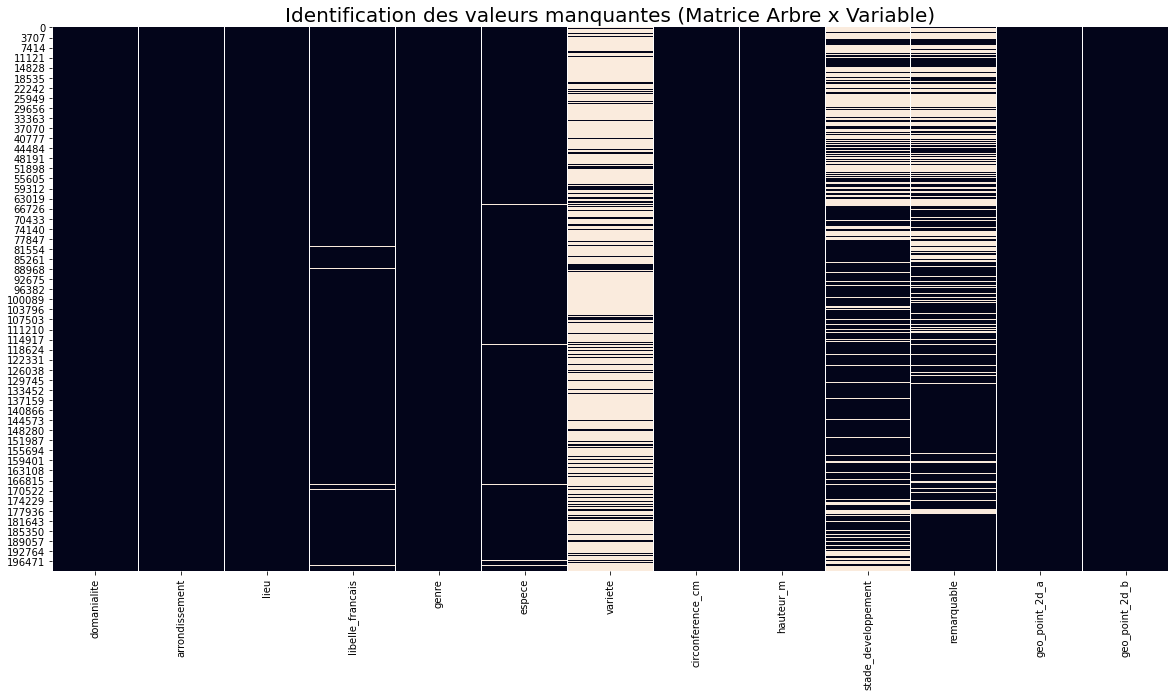

In [21]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Arbre x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

In [22]:
total_nan_value_number = data.isna().sum().sum()
print("Nombre total de valeurs manquantes dans le dataset = ", total_nan_value_number)

Nombre total de valeurs manquantes dans le dataset =  296929


In [23]:
nan_value_number_per_column = data.isna().sum().sort_values(ascending=False)
print("Nombre de valeurs manquantes par colonne :")
nan_value_number_per_column

Nombre de valeurs manquantes par colonne :


variete                163360
stade_developpement     67205
remarquable             63098
espece                   1752
libelle_francais         1497
genre                      16
domanialite                 1
geo_point_2d_b              0
geo_point_2d_a              0
hauteur_m                   0
circonference_cm            0
lieu                        0
arrondissement              0
dtype: int64

In [24]:
total_percentage_nan_value = (data.isna().sum().sum() / data.size) * 100
print("Pourcentage total de valeurs manquantes dans le dataset = ", total_percentage_nan_value)

Pourcentage total de valeurs manquantes dans le dataset =  11.412528571774489


In [25]:
nan_value_percentage_per_column = (data.isna().sum() / data.shape[0]).sort_values(ascending=False) * 100
print("Pourcentage de valeurs manquantes par colonne : ")
nan_value_percentage_per_column

Pourcentage de valeurs manquantes par colonne : 


variete                81.624088
stade_developpement    33.579498
remarquable            31.527404
espece                  0.875400
libelle_francais        0.747988
genre                   0.007995
domanialite             0.000500
geo_point_2d_b          0.000000
geo_point_2d_a          0.000000
hauteur_m               0.000000
circonference_cm        0.000000
lieu                    0.000000
arrondissement          0.000000
dtype: float64

## Suppression des données manquantes

### Suppression des colonnes avec trop de données manquantes : moins de 80% de données présentes

In [26]:
mask_80pct_data = data.isna().sum()/data.shape[0] < 0.8 #masque pour boolean indexing
mask_80pct_data

domanialite             True
arrondissement          True
lieu                    True
libelle_francais        True
genre                   True
espece                  True
variete                False
circonference_cm        True
hauteur_m               True
stade_developpement     True
remarquable             True
geo_point_2d_a          True
geo_point_2d_b          True
dtype: bool

In [27]:
data = data[data.columns[mask_80pct_data]]

In [28]:
data.shape

(200137, 12)

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200137 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          200136 non-null  object 
 1   arrondissement       200137 non-null  object 
 2   lieu                 200137 non-null  object 
 3   libelle_francais     198640 non-null  object 
 4   genre                200121 non-null  object 
 5   espece               198385 non-null  object 
 6   circonference_cm     200137 non-null  int64  
 7   hauteur_m            200137 non-null  int64  
 8   stade_developpement  132932 non-null  object 
 9   remarquable          137039 non-null  float64
 10  geo_point_2d_a       200137 non-null  float64
 11  geo_point_2d_b       200137 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.9+ MB


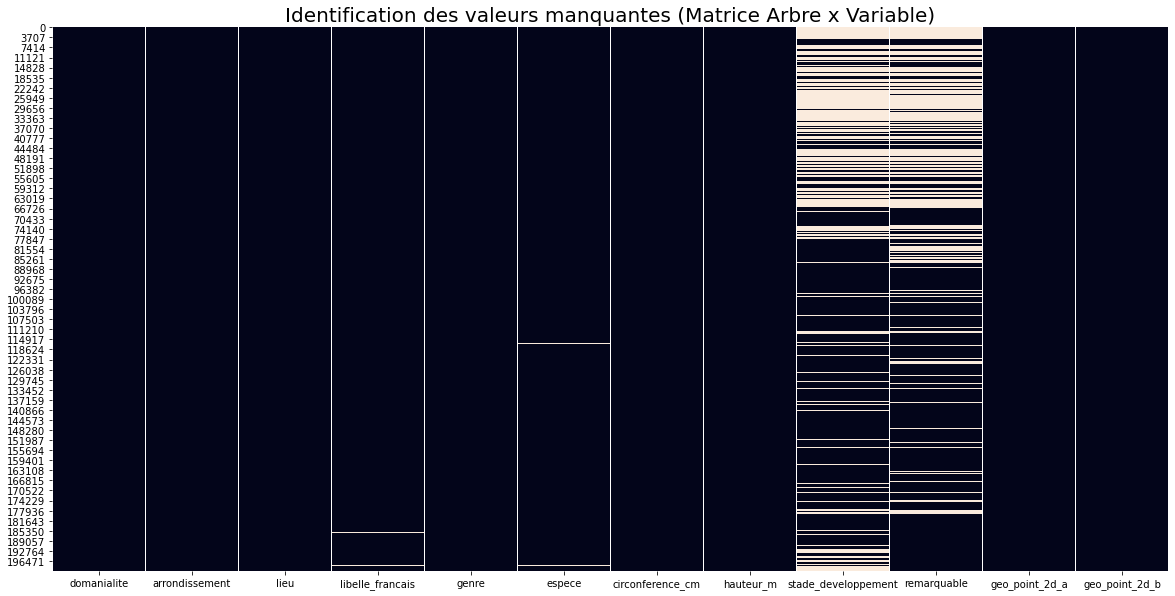

In [30]:
plt.figure(figsize=(20,10))
plt.title("Identification des valeurs manquantes (Matrice Arbre x Variable)", fontsize=20)
sns.heatmap(data.isna(), cbar=False)
plt.show()

### Suppression des lignes avec quelques données manquantes

In [31]:
var_dropna = ['domanialite', 'libelle_francais', 'genre', 'espece']

In [32]:
data.dropna(subset = var_dropna, inplace=True)

### **Après suppression des données manquantes**

In [33]:
data.shape

(197252, 12)

In [34]:
data.head()

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,A,NaN,48.857722,2.321006
4,Jardin,PARIS 17E ARRDT,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,Arbre à miel,Tetradium,daniellii,38,0,NaN,NaN,48.890435,2.315289


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197252 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          197252 non-null  object 
 1   arrondissement       197252 non-null  object 
 2   lieu                 197252 non-null  object 
 3   libelle_francais     197252 non-null  object 
 4   genre                197252 non-null  object 
 5   espece               197252 non-null  object 
 6   circonference_cm     197252 non-null  int64  
 7   hauteur_m            197252 non-null  int64  
 8   stade_developpement  131028 non-null  object 
 9   remarquable          134700 non-null  float64
 10  geo_point_2d_a       197252 non-null  float64
 11  geo_point_2d_b       197252 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.6+ MB


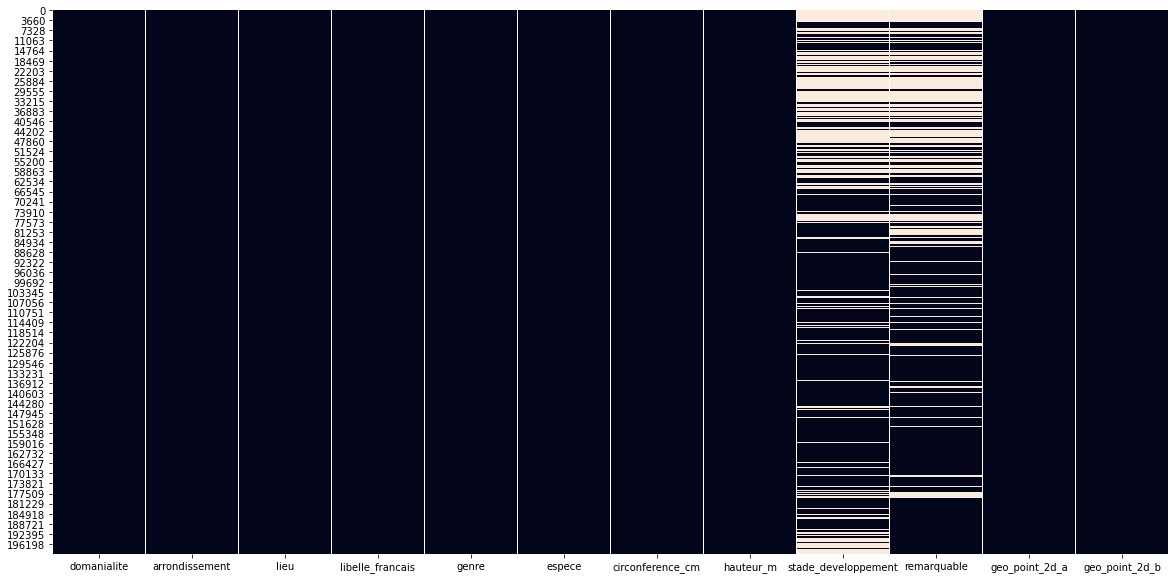

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar=False)
plt.show()

# 4 - Traitement des valeurs aberrantes

## Traitement Métier des valeurs aberrantes

 ### Identification Métier des valeurs aberrantes

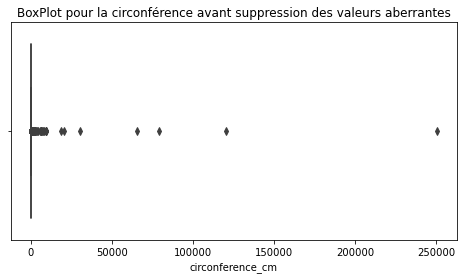

In [37]:
plt.figure(figsize=(8,4))
sns.boxplot(x='circonference_cm', data=data)
plt.title("BoxPlot pour la circonférence avant suppression des valeurs aberrantes")
plt.show()

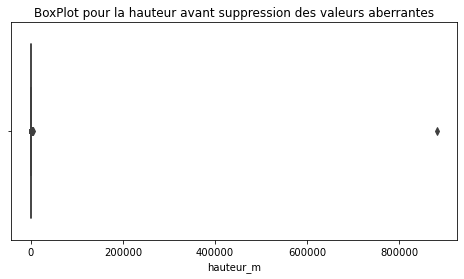

In [38]:
plt.figure(figsize=(8,4))
sns.boxplot(x='hauteur_m', data=data)
plt.title("BoxPlot pour la hauteur avant suppression des valeurs aberrantes")
plt.show()

### => Etude Métier : d'après des recherches sur Internet :
###  - l'arbre de France ayant la circonférence la plus élevée a une circonférence de 13.9 m 
### -> nous retiendrons une cironférence maximale de 14 m (= 1400 cm) pour notre étude. 
###  - l'arbre le plus haut de Fance a une hauteur de 66.6 m 
### -> nous retiendrons une hauteur de  maximale de 70 m pour notre étude.

 ### Suppression Métier des valeurs aberrantes

### Traitement de la circonférence des arbres

In [39]:
(data["circonference_cm"] >= 1400).sum()

34

In [40]:
((data["circonference_cm"] >= 1400).sum()) / ((data["circonference_cm"]).sum())*100

0.00020552572846629873

In [41]:
(data["circonference_cm"] == 0).sum()

25400

In [42]:
((data["circonference_cm"] == 0).sum()) / ((data["circonference_cm"]).sum())*100

0.15353980891305846

### -> avant suppression des valeurs aberrantes circonference_cm :

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197252 entries, 0 to 200136
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          197252 non-null  object 
 1   arrondissement       197252 non-null  object 
 2   lieu                 197252 non-null  object 
 3   libelle_francais     197252 non-null  object 
 4   genre                197252 non-null  object 
 5   espece               197252 non-null  object 
 6   circonference_cm     197252 non-null  int64  
 7   hauteur_m            197252 non-null  int64  
 8   stade_developpement  131028 non-null  object 
 9   remarquable          134700 non-null  float64
 10  geo_point_2d_a       197252 non-null  float64
 11  geo_point_2d_b       197252 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.6+ MB


In [44]:
data = data[(data["circonference_cm"] > 0) & (data["circonference_cm"] < 1400)]

### -> après suppression des valeurs aberrantes circonference_cm :

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171818 entries, 0 to 198878
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          171818 non-null  object 
 1   arrondissement       171818 non-null  object 
 2   lieu                 171818 non-null  object 
 3   libelle_francais     171818 non-null  object 
 4   genre                171818 non-null  object 
 5   espece               171818 non-null  object 
 6   circonference_cm     171818 non-null  int64  
 7   hauteur_m            171818 non-null  int64  
 8   stade_developpement  130717 non-null  object 
 9   remarquable          128668 non-null  float64
 10  geo_point_2d_a       171818 non-null  float64
 11  geo_point_2d_b       171818 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 17.0+ MB


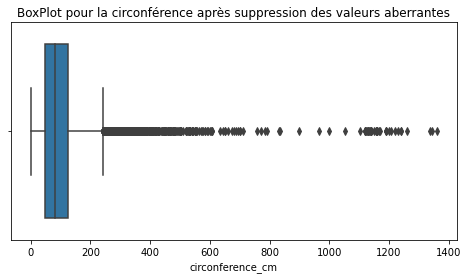

In [46]:
plt.figure(figsize=(8,4))
sns.boxplot(x='circonference_cm', data=data)
plt.title("BoxPlot pour la circonférence après suppression des valeurs aberrantes")
plt.show()

### Traitement de la hauteur des arbres

In [47]:
(data["hauteur_m"] >= 70).sum()

348

In [48]:
((data["hauteur_m"] >= 70).sum()) / ((data["circonference_cm"]).sum())*100

0.002197228953340517

In [49]:
(data["hauteur_m"] == 0).sum()

13528

In [50]:
((data["hauteur_m"] == 0).sum()) / ((data["hauteur_m"]).sum())*100

0.5197859072239022

### -> avant suppression des valeurs aberrantes hauteur_m :

In [51]:
data.shape

(171818, 12)

In [52]:
data = data[(data["hauteur_m"] > 0) & (data["hauteur_m"] < 70)]

### -> après suppression des valeurs aberrantes hauteur_m :

In [53]:
data.shape

(157942, 12)

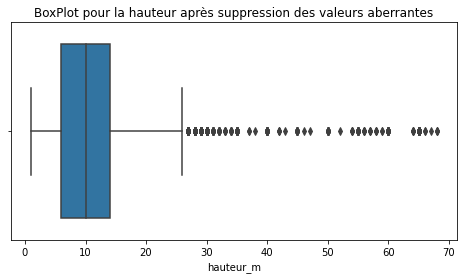

In [54]:
plt.figure(figsize=(8,4))
sns.boxplot(x='hauteur_m', data=data)
plt.title("BoxPlot pour la hauteur après suppression des valeurs aberrantes")
plt.show()

## Traitement Statistique des valeurs atypiques

### Identification Statistique des valeurs atypiques

In [55]:
def remove_outliers(col, df):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    return df.query(f"{col} >= {q1-1.5*iqr} and {col} <= {q3+1.5*iqr}")

 ### Suppression Statistique des valeurs atypiques

### Traitement de la circonférence des arbres

In [56]:
print("Nombre de valeurs avant suppression : ", data['circonference_cm'].count())

Nombre de valeurs avant suppression :  157942


In [57]:
data = remove_outliers('circonference_cm', data)

In [58]:
print("Nombre de valeurs après suppression : ", data['circonference_cm'].count())

Nombre de valeurs après suppression :  154273


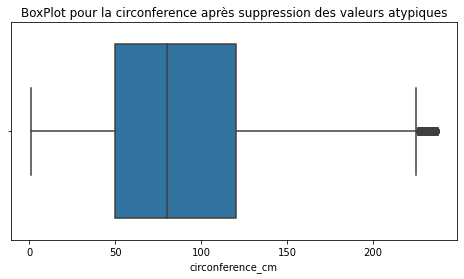

In [59]:
plt.figure(figsize=(8,4))
sns.boxplot(x='circonference_cm', data=data)
plt.title("BoxPlot pour la circonference après suppression des valeurs atypiques")
plt.show()

### Traitement de la hauteur des arbres

In [60]:
print("Nombre de valeurs avant suppression : ", data['hauteur_m'].count())

Nombre de valeurs avant suppression :  154273


In [61]:
data = remove_outliers('hauteur_m', data)

In [62]:
print("Nombre de valeurs après suppression : ", data['hauteur_m'].count())

Nombre de valeurs après suppression :  153795


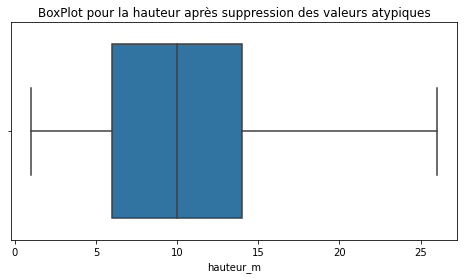

In [63]:
plt.figure(figsize=(8,4))
sns.boxplot(x='hauteur_m', data=data)
plt.title("BoxPlot pour la hauteur après suppression des valeurs atypiques")
plt.show()

# 5 - Traitement des colonnes avec des données qualitatives catégorielles

## Changement des variables de type Object -> type Categorical

In [64]:
data.dtypes.value_counts()

object     7
float64    3
int64      2
dtype: int64

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153795 entries, 0 to 198878
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   domanialite          153795 non-null  object 
 1   arrondissement       153795 non-null  object 
 2   lieu                 153795 non-null  object 
 3   libelle_francais     153795 non-null  object 
 4   genre                153795 non-null  object 
 5   espece               153795 non-null  object 
 6   circonference_cm     153795 non-null  int64  
 7   hauteur_m            153795 non-null  int64  
 8   stade_developpement  124958 non-null  object 
 9   remarquable          122218 non-null  float64
 10  geo_point_2d_a       153795 non-null  float64
 11  geo_point_2d_b       153795 non-null  float64
dtypes: float64(3), int64(2), object(7)
memory usage: 15.3+ MB


In [66]:
for col in data.select_dtypes('object'):
    print(col)

domanialite
arrondissement
lieu
libelle_francais
genre
espece
stade_developpement


In [67]:
for col in data.select_dtypes('object'):
    data[col] = data[col].astype("category")

## La variable 'remarquable' est une donnée catégorielle

In [68]:
data['remarquable'] = data['remarquable'].astype("category")

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153795 entries, 0 to 198878
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   domanialite          153795 non-null  category
 1   arrondissement       153795 non-null  category
 2   lieu                 153795 non-null  category
 3   libelle_francais     153795 non-null  category
 4   genre                153795 non-null  category
 5   espece               153795 non-null  category
 6   circonference_cm     153795 non-null  int64   
 7   hauteur_m            153795 non-null  int64   
 8   stade_developpement  124958 non-null  category
 9   remarquable          122218 non-null  category
 10  geo_point_2d_a       153795 non-null  float64 
 11  geo_point_2d_b       153795 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 7.9 MB


In [70]:
data.dtypes.value_counts()

float64     2
int64       2
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

# Copie des données nettoyées

In [71]:
data_cleaned = data.copy(deep=True)

# Sauvegarde des données nettoyées

In [72]:
data_cleaned.to_csv("cleaned.csv")

# C - Synthèse de l’analyse de données et visualisation des données

## 1 - Synthèse de l’analyse de données après nettoyage

### Volumétrie des données

In [73]:
data_cleaned_size = data_cleaned.shape
nb_rows = data_cleaned_size[0]
nb_columns = data_cleaned_size[1]
print(f"Nombre de lignes après nettoyage : {nb_rows}")
print(f"Nombre de colonnes après nettoyage : {nb_columns}")

Nombre de lignes après nettoyage : 153795
Nombre de colonnes après nettoyage : 12


### => Nombre d'individus = 153 795 / Nombre de variables = 12

### Type des données

In [74]:
data_cleaned.dtypes.value_counts()

float64     2
int64       2
category    1
category    1
category    1
category    1
category    1
category    1
category    1
category    1
dtype: int64

### => 4 variables quantitatives et 8 variables qualitatives

### Structure des données

In [75]:
data_cleaned.head()

,domanialite,arrondissement,lieu,libelle_francais,genre,espece,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Marronnier,Aesculus,hippocastanum,20,5,NaN,0.0,48.857620,2.320962
1,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,65,8,A,NaN,48.857656,2.321031
2,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,If,Taxus,baccata,90,10,A,NaN,48.857705,2.321061
3,Jardin,PARIS 7E ARRDT,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,Erable,Acer,negundo,60,8,A,NaN,48.857722,2.321006
8,Jardin,PARIS 16E ARRDT,JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH,Sophora,Sophora,japonica,145,14,A,0.0,48.871990,2.275814


In [76]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153795 entries, 0 to 198878
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   domanialite          153795 non-null  category
 1   arrondissement       153795 non-null  category
 2   lieu                 153795 non-null  category
 3   libelle_francais     153795 non-null  category
 4   genre                153795 non-null  category
 5   espece               153795 non-null  category
 6   circonference_cm     153795 non-null  int64   
 7   hauteur_m            153795 non-null  int64   
 8   stade_developpement  124958 non-null  category
 9   remarquable          122218 non-null  category
 10  geo_point_2d_a       153795 non-null  float64 
 11  geo_point_2d_b       153795 non-null  float64 
dtypes: category(8), float64(2), int64(2)
memory usage: 7.9 MB


### Indicateurs statistiques pour les variables quantitatives

In [77]:
data_cleaned.describe()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,153795.000000,153795.000000,153795.000000,153795.000000
mean,88.232706,10.112123,48.855999,2.345880
std,50.888713,4.807271,0.025745,0.049414
min,1.000000,1.000000,48.742290,2.210416
25%,50.000000,6.000000,48.836971,2.307115
50%,80.000000,10.000000,48.855253,2.348420
75%,120.000000,14.000000,48.874142,2.383224
max,237.000000,26.000000,48.911485,2.469759


### Indicateurs statistiques pour les variables qualitatives

### Nombre de modalités

In [78]:
for col in data_cleaned.select_dtypes('category'):
    print(col, " : ")
    print(data_cleaned[col].nunique())
    print()

domanialite  : 
9

arrondissement  : 
25

lieu  : 
5384

libelle_francais  : 
168

genre  : 
145

espece  : 
366

stade_developpement  : 
4

remarquable  : 
2



### Liste des modalités

In [79]:
for col in data_cleaned.select_dtypes('category'):
    print(data_cleaned[col].unique())
    print()

['Jardin', 'Alignement', 'DJS', 'DFPE', 'CIMETIERE', 'DASCO', 'DAC', 'PERIPHERIQUE', 'DASES']
Categories (9, object): ['Jardin', 'Alignement', 'DJS', 'DFPE', ..., 'DASCO', 'DAC', 'PERIPHERIQUE', 'DASES']

['PARIS 7E ARRDT', 'PARIS 16E ARRDT', 'PARIS 4E ARRDT', 'PARIS 13E ARRDT', 'PARIS 12E ARRDT', ..., 'PARIS 9E ARRDT', 'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE', 'BOIS DE VINCENNES']
Length: 25
Categories (25, object): ['PARIS 7E ARRDT', 'PARIS 16E ARRDT', 'PARIS 4E ARRDT', 'PARIS 13E ARRDT', ..., 'PARIS 10E ARRDT', 'PARIS 8E ARRDT', 'BOIS DE BOULOGNE', 'BOIS DE VINCENNES']

['MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E', 'JARDIN DE L AVENUE FOCH / 10 AVENUE FOCH', 'JARDIN DE LA CITE INTERNATIONALE DES ARTS', 'SQUARE ALBERT SCHWEITZER', 'SQUARE CLARA ZETKIN / 21 AVENUE BOUTROUX', ..., 'TALUS N°27-02', 'TERRAIN D EDUCATION PHYSIQUE / 49 RUE OLIVIER..., 'IMPASSE DU GUE', 'RUE EDOUARD QUENU', 'RUE DU GENERAL NIESSEL']
Length: 5384
Categories (5384, object): ['MAIRIE DU 7E 116 R

### Nombre d'arbres pour chaque modalité

In [80]:
for col in data_cleaned.select_dtypes('category'):
    print(data_cleaned[col].value_counts())
    print()

Alignement      96698
Jardin          25108
CIMETIERE       15795
DASCO            6271
PERIPHERIQUE     5091
DJS              3566
DFPE             1242
DAC                20
DASES               4
Name: domanialite, dtype: int64

PARIS 16E ARRDT      14423
PARIS 13E ARRDT      13287
PARIS 20E ARRDT      12453
PARIS 12E ARRDT      11627
PARIS 15E ARRDT      11130
PARIS 14E ARRDT      10825
PARIS 19E ARRDT       9815
PARIS 17E ARRDT       8465
PARIS 7E ARRDT        8167
PARIS 18E ARRDT       8159
BOIS DE VINCENNES     7659
PARIS 8E ARRDT        6799
PARIS 11E ARRDT       5406
SEINE-SAINT-DENIS     5208
BOIS DE BOULOGNE      3198
VAL-DE-MARNE          3175
PARIS 10E ARRDT       2665
PARIS 4E ARRDT        2572
PARIS 5E ARRDT        2130
PARIS 6E ARRDT        1693
PARIS 1ER ARRDT       1273
PARIS 3E ARRDT        1173
PARIS 9E ARRDT        1084
HAUTS-DE-SEINE         886
PARIS 2E ARRDT         523
Name: arrondissement, dtype: int64

PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE               

## 2 - Visualisation des données quantitatives

### Histogrammes

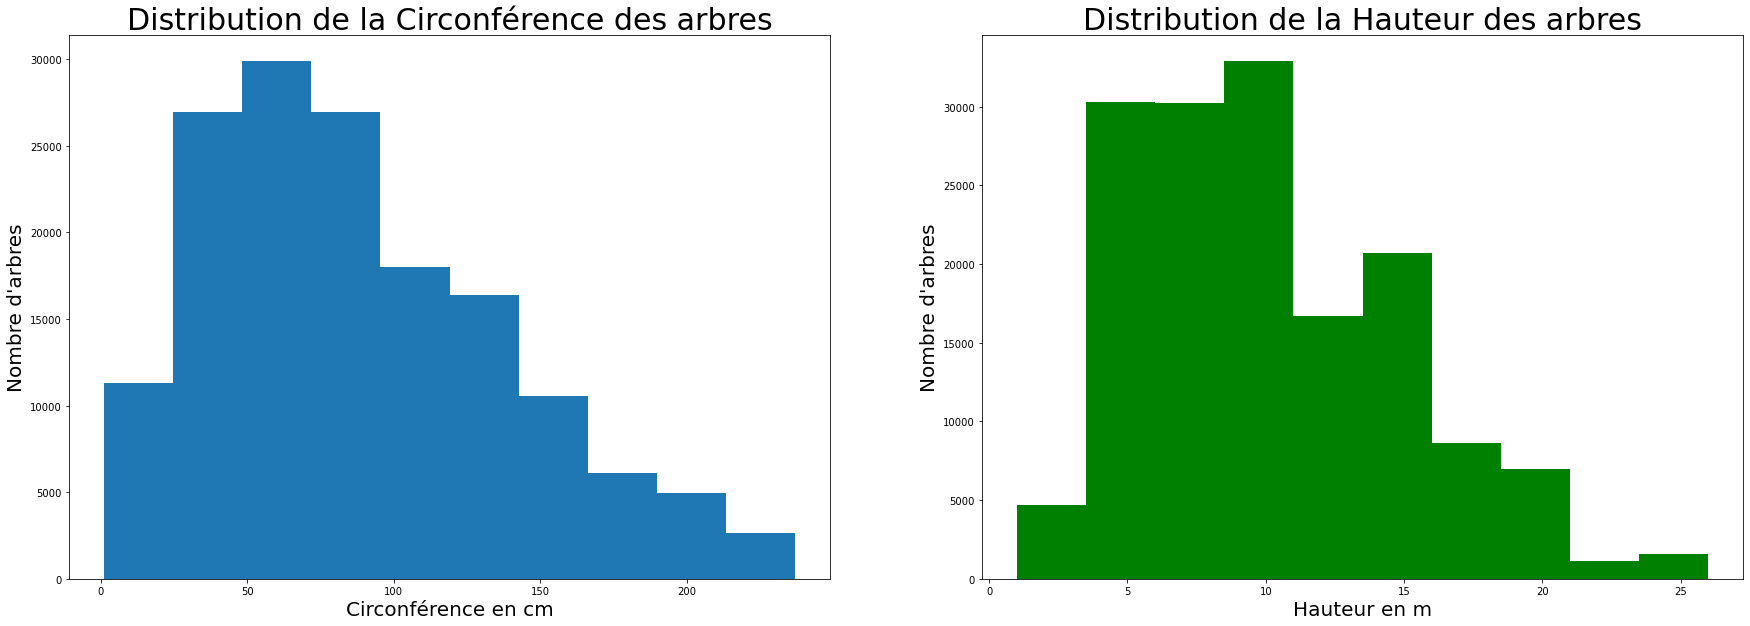

In [81]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['circonference_cm'])
plt.xlabel("Circonférence en cm", fontsize=20)
plt.ylabel("Nombre d'arbres", fontsize=20)
plt.title("Distribution de la Circonférence des arbres", fontsize=30)
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['hauteur_m'], color='green')
plt.xlabel("Hauteur en m", fontsize=20)
plt.ylabel("Nombre d'arbres", fontsize=20)
plt.title("Distribution de la Hauteur des arbres", fontsize=30)
plt.show()

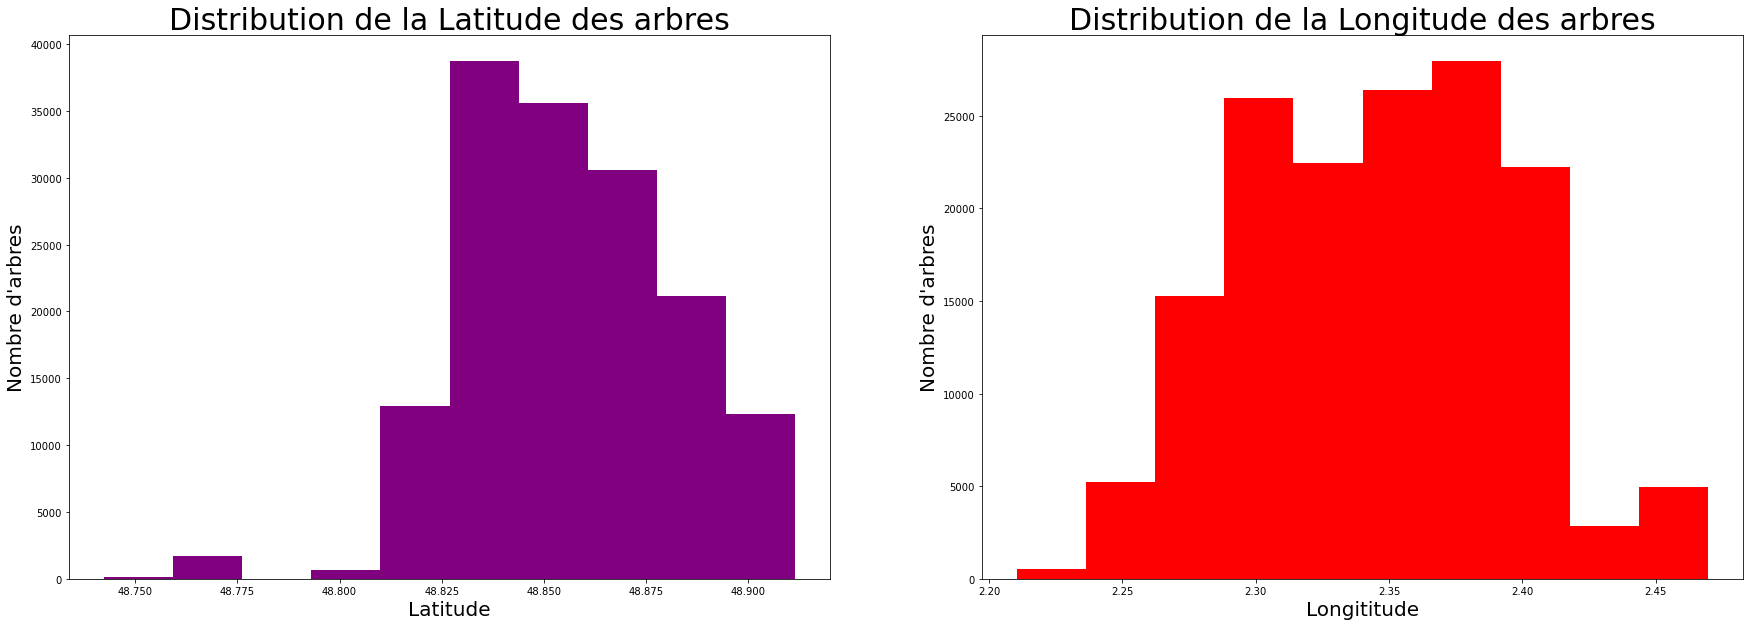

In [82]:
plt.figure(figsize=(30, 10))
plt.subplot(1, 2, 1)
plt.hist(data_cleaned['geo_point_2d_a'], color='purple')
plt.xlabel("Latitude", fontsize=20)
plt.ylabel("Nombre d'arbres", fontsize=20)
plt.title("Distribution de la Latitude des arbres", fontsize=30)
plt.subplot(1, 2, 2)
plt.hist(data_cleaned['geo_point_2d_b'], color='red')
plt.xlabel("Longititude", fontsize=20)
plt.ylabel("Nombre d'arbres", fontsize=20)
plt.title("Distribution de la Longitude des arbres", fontsize=30)
plt.show()

### BoxPlots (Boîtes de dispersion)

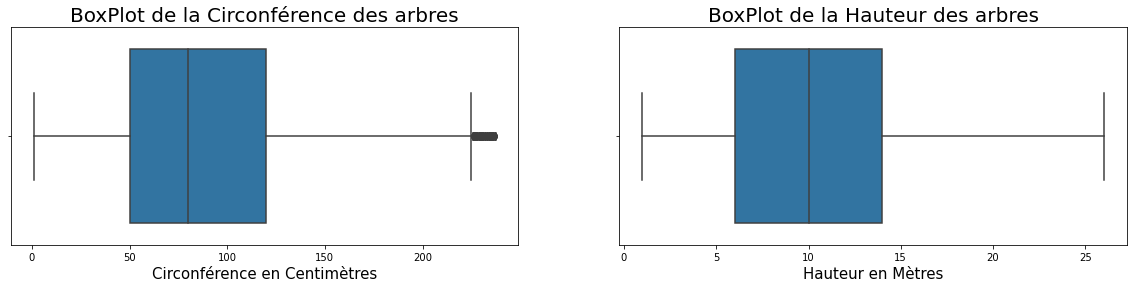

In [83]:
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='circonference_cm', data=data_cleaned)
plt.xlabel("Circonférence en Centimètres", fontsize=15)
plt.title("BoxPlot de la Circonférence des arbres", fontsize=20)
plt.subplot(1, 2, 2)
sns.boxplot(x='hauteur_m', data=data_cleaned)
plt.xlabel("Hauteur en Mètres", fontsize=15)
plt.title("BoxPlot de la Hauteur des arbres", fontsize=20)
plt.show()

### ViolinPlots

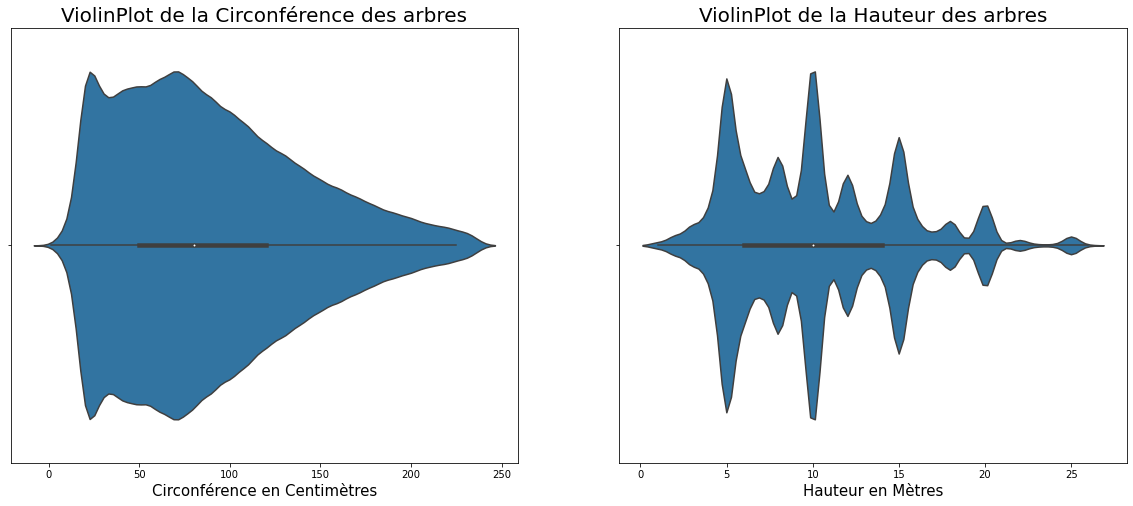

In [84]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.violinplot(x='circonference_cm', data=data_cleaned)
plt.xlabel("Circonférence en Centimètres", fontsize=15)
plt.title("ViolinPlot de la Circonférence des arbres", fontsize=20)
plt.subplot(1, 2, 2)
sns.violinplot(x='hauteur_m', data=data_cleaned)
plt.xlabel("Hauteur en Mètres", fontsize=15)
plt.title("ViolinPlot de la Hauteur des arbres", fontsize=20)
plt.show()

## 3 - Visualisation des données qualitatives

In [85]:
var_low_cardinality = ['stade_developpement','remarquable']
var_medium_cardinality = ['domanialite','arrondissement']
var_high_cardinality = ['lieu', 'libelle_francais', 'genre', 'espece']

### Variables avec un nombre de modalités peu élevé -> Camemberts (Pie Charts)

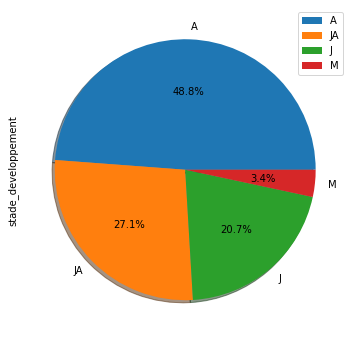

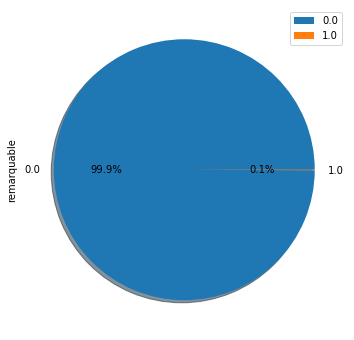

In [86]:
for col in var_low_cardinality:
    plt.figure(figsize=(8,6))
    data_cleaned[col].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
    plt.legend()
    plt.show()

### Variable avec un nombre de modalités moyen -> Diagrammes en bâtons (Bar Plots)

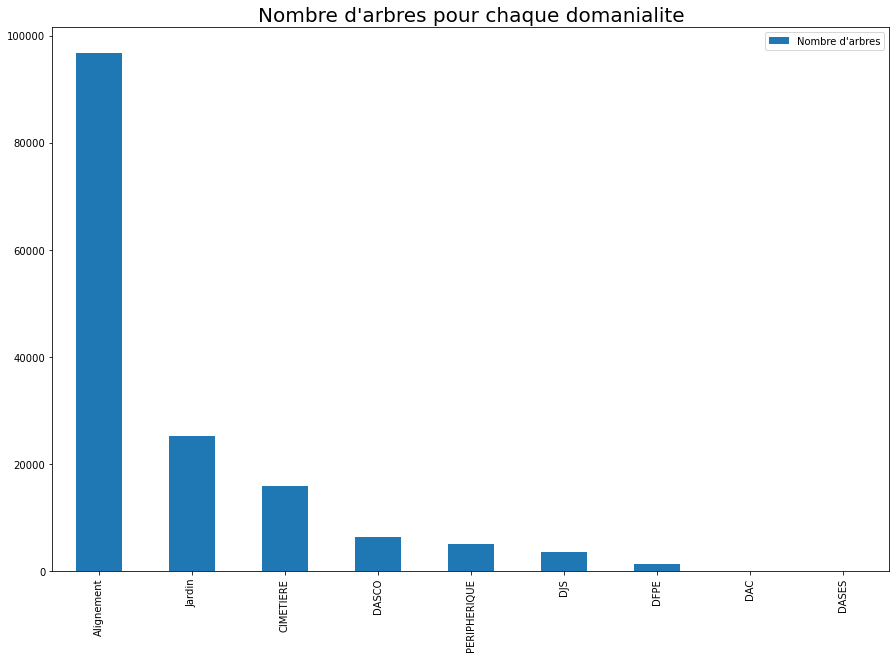

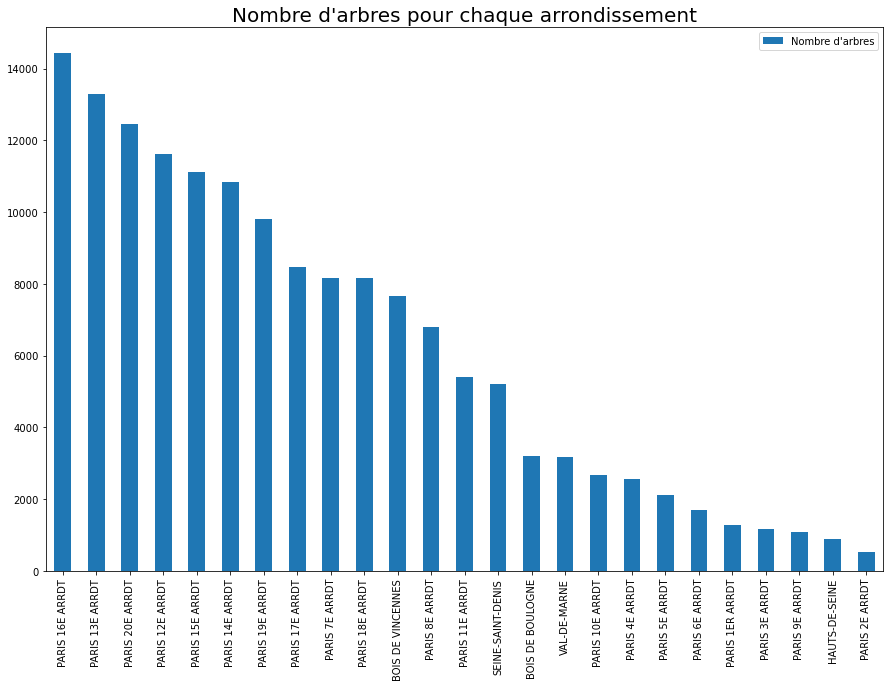

In [87]:
for col in var_medium_cardinality:
    plt.figure(figsize=(15,10))
    data_cleaned[col].value_counts().plot.bar(label="Nombre d'arbres")
    plt.title("Nombre d'arbres pour chaque " + col, fontsize=20)
    plt.legend()
    plt.show()

### Variable avec un nombre de modalités élevé -> Nuages de mots (Words Clouds)

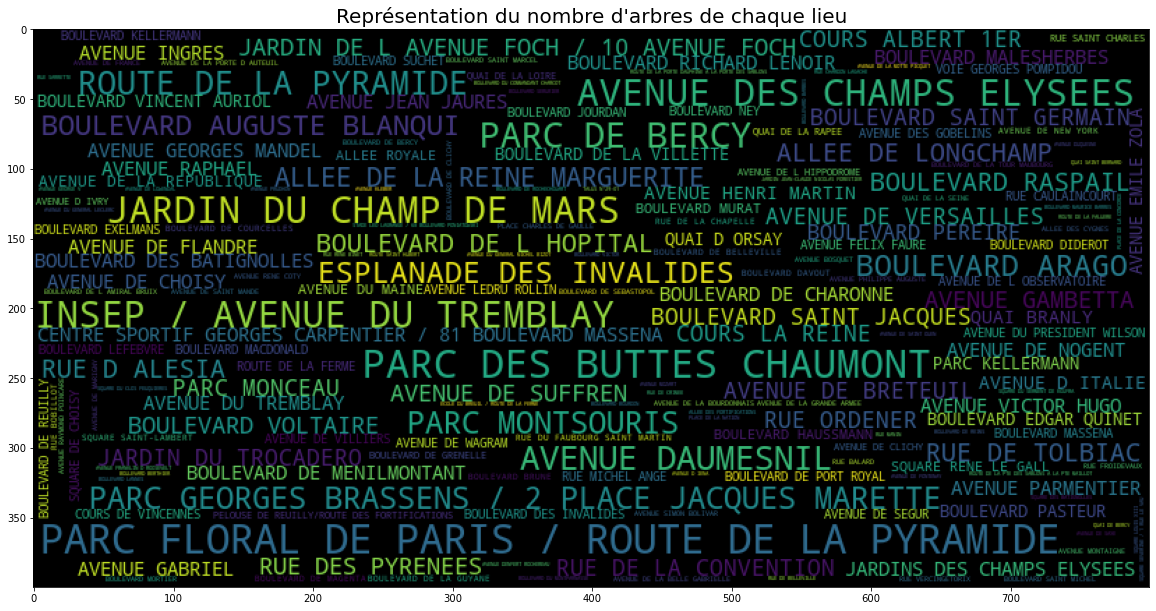

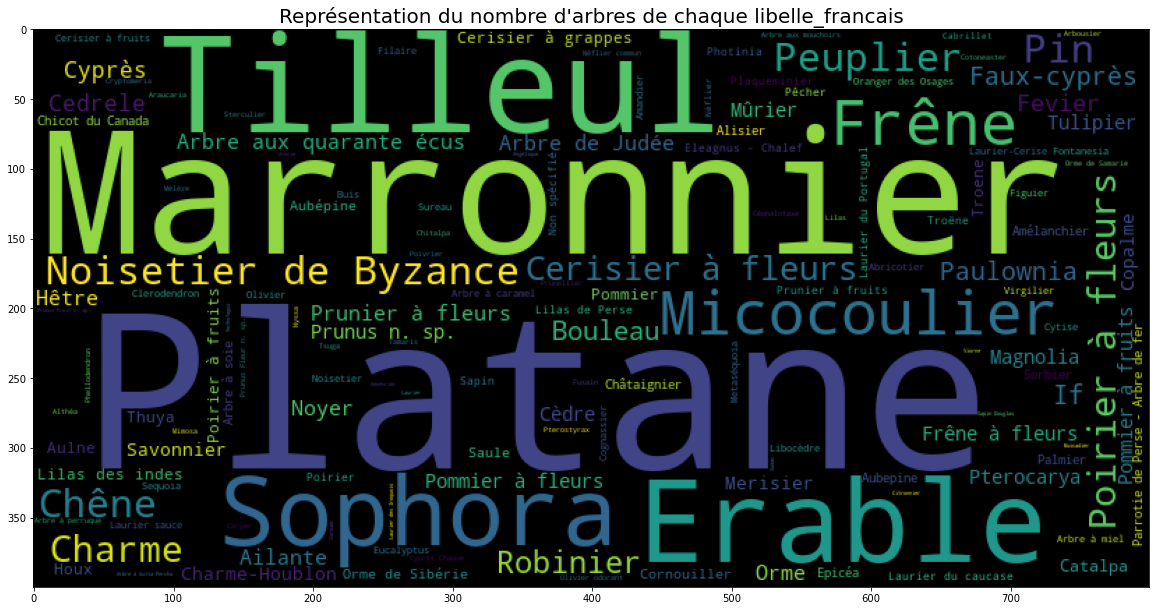

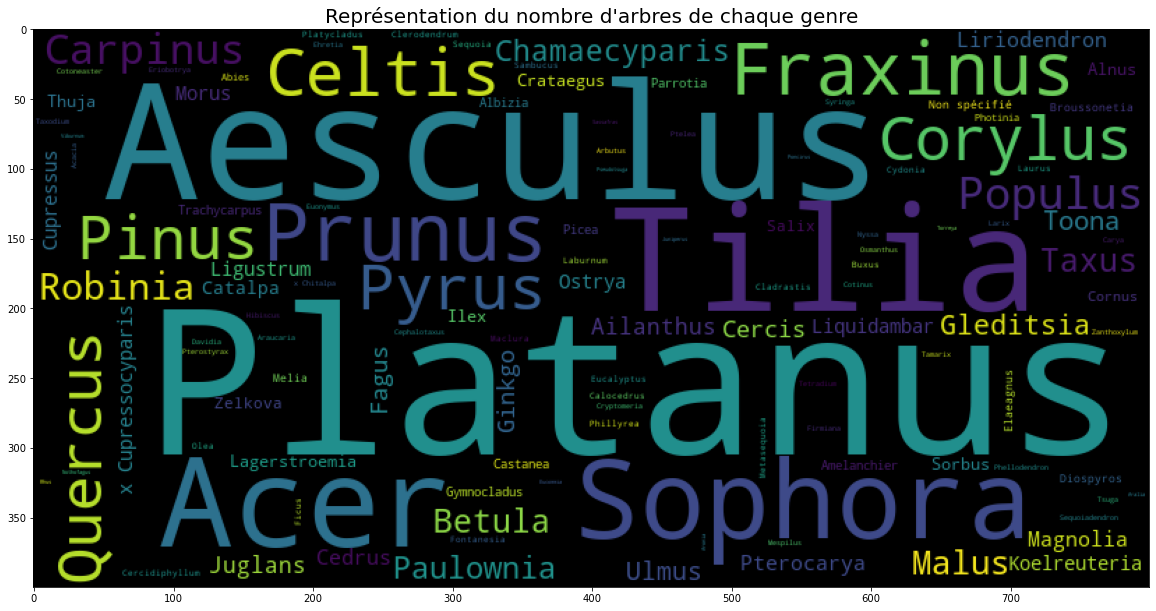

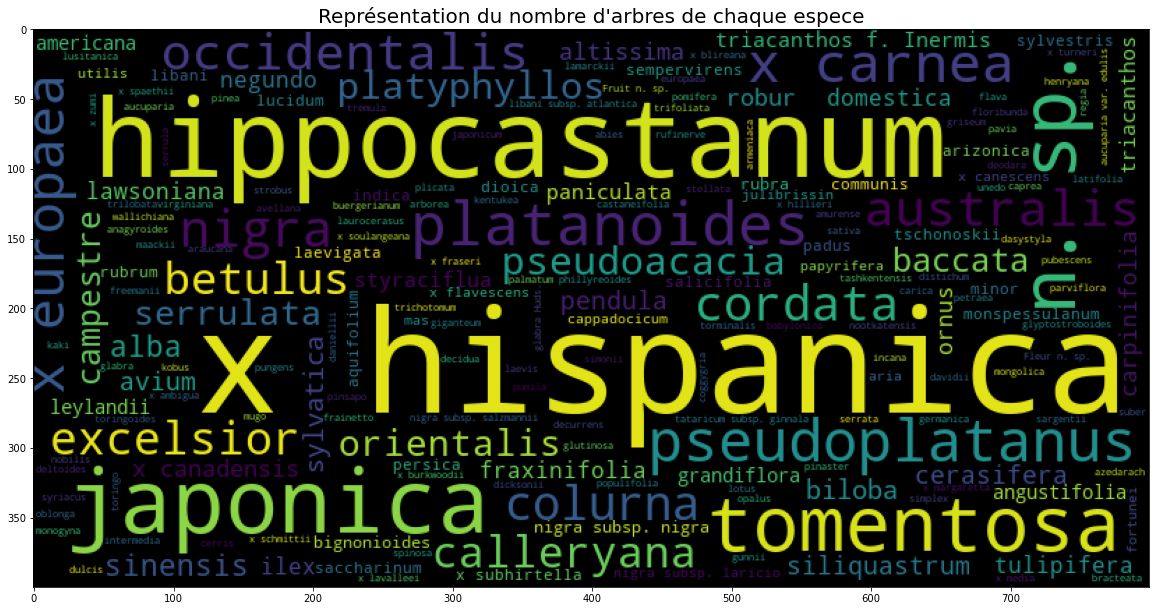

In [88]:
for col in var_high_cardinality:
    var_occurences = data_cleaned[col].value_counts().to_dict()
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(var_occurences)
    plt.figure(figsize=(20,15))
    plt.title("Représentation du nombre d'arbres de chaque " + col, fontsize=20)
    plt.imshow(wordcloud)

## 4 - Visualisation de la localisation des arbres

In [89]:
x=data_cleaned["geo_point_2d_a"]
y=data_cleaned["geo_point_2d_b"]

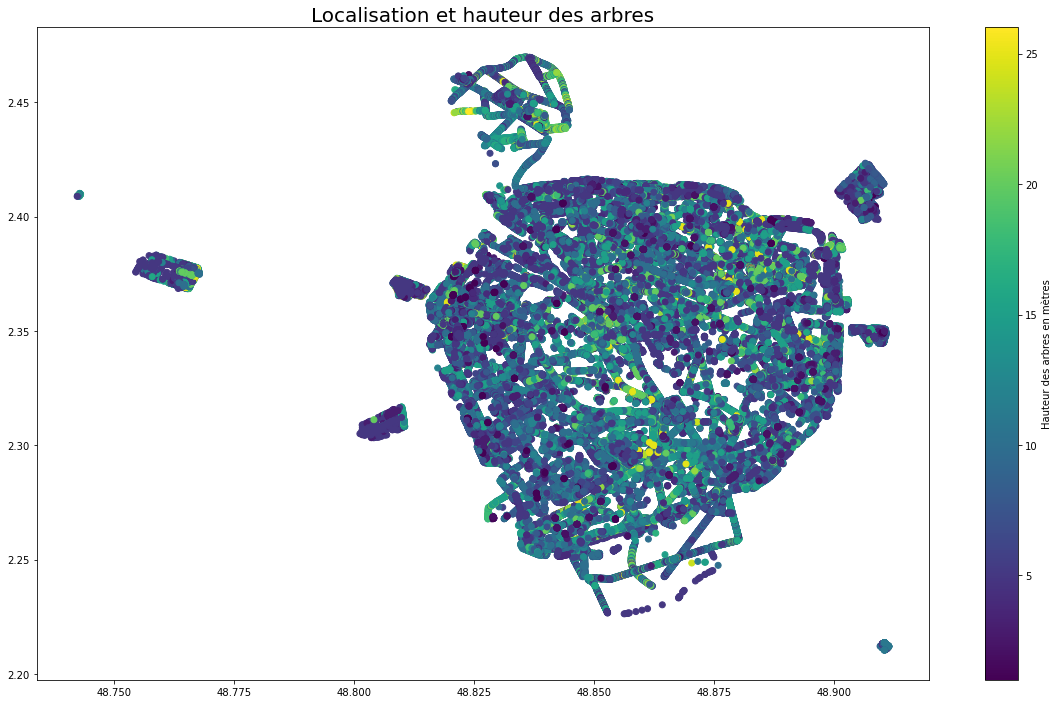

In [90]:
plt.figure(figsize=(20, 12))
plt.title("Localisation et hauteur des arbres", fontsize=20)
plt.scatter(x, y, c=data_cleaned['hauteur_m'])
plt.colorbar(label="Hauteur des arbres en mètres")
plt.show()